# Disease Prediction Using Machine Learning

Kaggle link: https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning

#### Notes from kaggle: 
* Complete Dataset consists of 2 CSV files . One of them is training and other is for testing your model.
* Each CSV file has 133 columns. 132 of these columns are symptoms that a person experiences and last column is the prognosis.
* These symptoms are mapped to 42 diseases you can classify these set of symptoms to.
* You are required to train your model on training data and test it on testing data.

In [1]:
#for cleaning and pre-processing data
import pandas as pd
import numpy as np
#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#for finding mode
from collections import Counter
#for ML modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# I. Importing the datasets (training and test) to Python

## A. Importing the training dataset

In [2]:
df = pd.read_csv('Training.csv').dropna(axis = 1)

In [3]:
df.shape

(4920, 133)

In [4]:
df.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [5]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [6]:
#Categorial Features
df.select_dtypes(include = 'object').columns.tolist()

['prognosis']

In [7]:
#Numerical Features
df.select_dtypes(include = ['float','int']).columns.tolist()

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


## B. Importing the test dataset

In [8]:
test_df = pd.read_csv('Testing.csv').dropna(axis=1)

In [9]:
test_df.shape

(42, 133)

In [10]:
test_df.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [11]:
test_df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [12]:
#Categorial Features
test_df.select_dtypes(include = 'object').columns.tolist()

['prognosis']

In [13]:
#Numerical Features
test_df.select_dtypes(include = ['float','int']).columns.tolist()

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


# II. Data Cleaning

## A. Checking for Missing Values:

In [14]:
#Setting the option to display up to 500 rows
pd.set_option('display.max_rows', 500)

In [15]:
#Percentage of missing values per feature
np.round(df.isna().sum() / len(df) *100, 4)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

From the above we see no missing values. 

## B. Checking the data types of all the columns

In [16]:
df.dtypes

itching                            int64
skin_rash                          int64
nodal_skin_eruptions               int64
continuous_sneezing                int64
shivering                          int64
chills                             int64
joint_pain                         int64
stomach_pain                       int64
acidity                            int64
ulcers_on_tongue                   int64
muscle_wasting                     int64
vomiting                           int64
burning_micturition                int64
spotting_ urination                int64
fatigue                            int64
weight_gain                        int64
anxiety                            int64
cold_hands_and_feets               int64
mood_swings                        int64
weight_loss                        int64
restlessness                       int64
lethargy                           int64
patches_in_throat                  int64
irregular_sugar_level              int64
cough           

# III. Class Imbalance Check

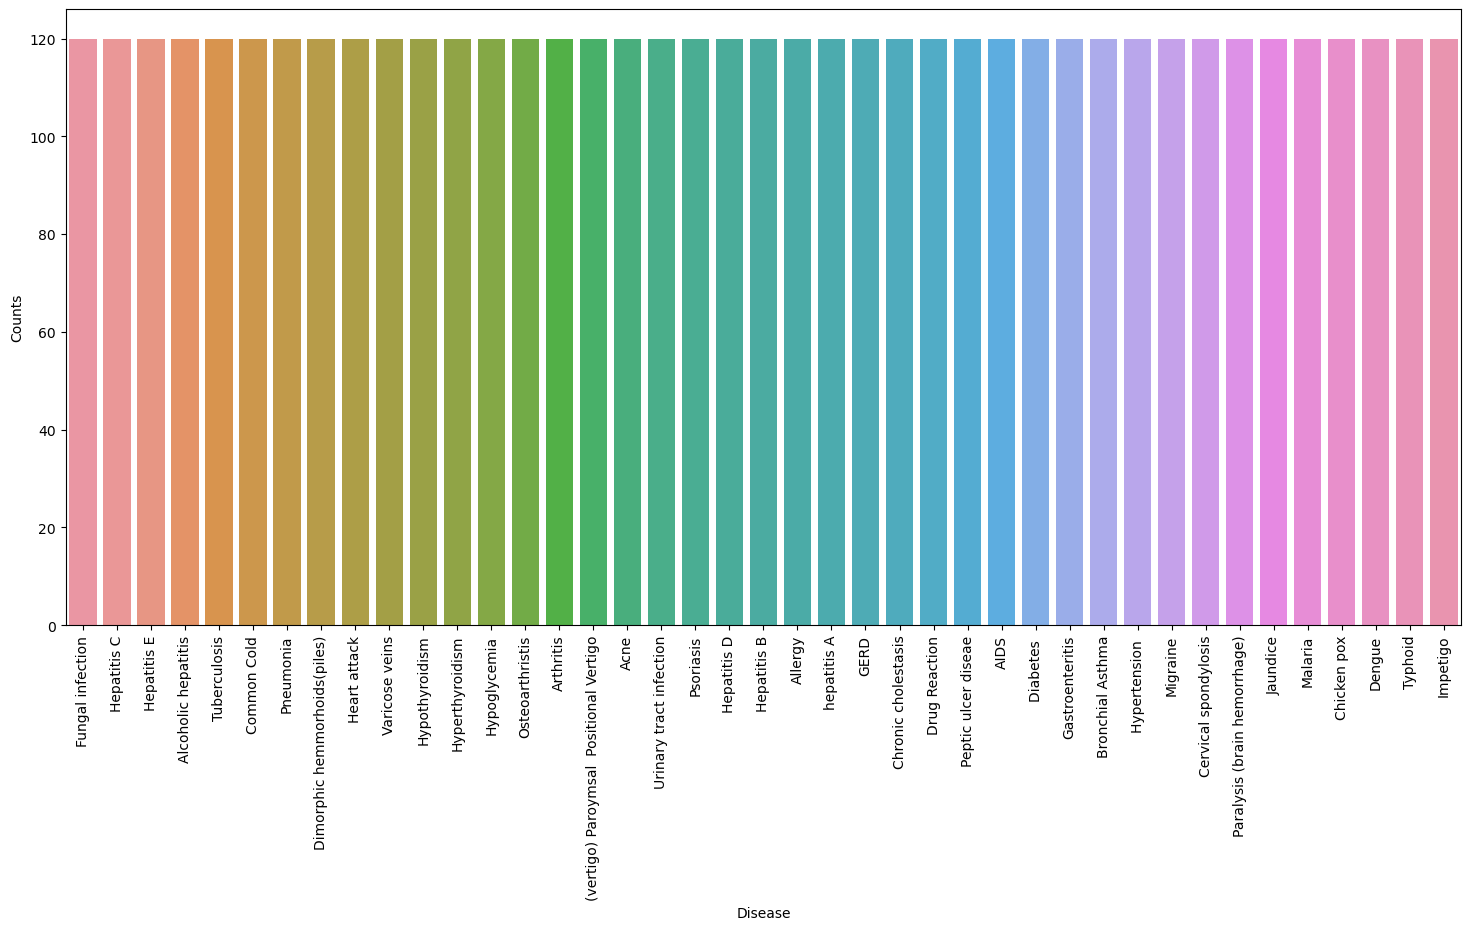

In [17]:
#Plotting for class imbalance
disease_classes = df.prognosis.value_counts()

class_df = pd.DataFrame({
    "Disease": disease_classes.index,
    "Counts": disease_classes.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = class_df)
plt.xticks(rotation=90)
plt.show()

From the above, we see that there's no class imbalance.

# IV. Preprocessing:

## A. Converting Target Variable to int type

Our target column - "prognosis" is of object type, hence using label encoder to convert the prognosis column to the numerical datatype. 

In [18]:
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

In [19]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35


## B. Splitting the dataset:

Division of the dataset into 2 parts - 80% for training and 20% for test.

In [20]:
#Taking only the features
X = df.iloc[:,:-1]
#Taking the target variable 
y = df.iloc[:, -1]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


# V. Model Building

Approach: Will be K-Fold cross-validation to evaluate the models, will be using Support Vector classifier, Gaussian Naive Bayes classifier and Random Forest Classifier for cross-validation.

In [22]:
#Using the accuracy_score function to get the accuracy of the model - using this as our metric to evaluate the models
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))
 
#Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
 
#Cross validation score for the models keeping k=10
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, n_jobs = -1, scoring = cv_scoring)
    print("__"*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

____________________________________________________________
SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
____________________________________________________________
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
____________________________________________________________
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


* From the above output we see that, our ML models are performing very well and their mean scores after k-fold validation is 100%.
* To build a robust model, will be combining these 3 models by taking the mode of the predictions (taking mode - because even if one model makes wrong prediction, the other models making the right prediction will be more and hence the final prediction will be right).
* Will be training the three models on training data and will be checking the accuracy and confusion matrix on test data

In [23]:
#Function to train and test the dataset
def train_and_test(classifier, X_train, y_train, X_test, y_test, name="Classifier"):
    #Training the model
    classifier.fit(X_train, y_train)
    
    #Making predictions
    train_preds = classifier.predict(X_train)
    test_preds = classifier.predict(X_test)
    
    #Calculating accuracy
    train_accuracy = accuracy_score(y_train, train_preds) * 100
    test_accuracy = accuracy_score(y_test, test_preds) * 100
    
    #Printing accuracies
    print(f"% Accuracy - train data - {name}: {train_accuracy}")
    print(f"% Accuracy - test data - {name}: {test_accuracy}")
    
    #Returning the predictions and model
    return test_preds, classifier

In [24]:
#Function for Plotting the Confusion Matrix
def plot_confusion_matrix(y_true, y_preds, title="Confusion Matrix"):
    cf_matrix = confusion_matrix(y_true, y_preds)
    plt.figure(figsize=(12,8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

% Accuracy - train data - SVM Classifier: 100.0
% Accuracy - test data - SVM Classifier: 100.0


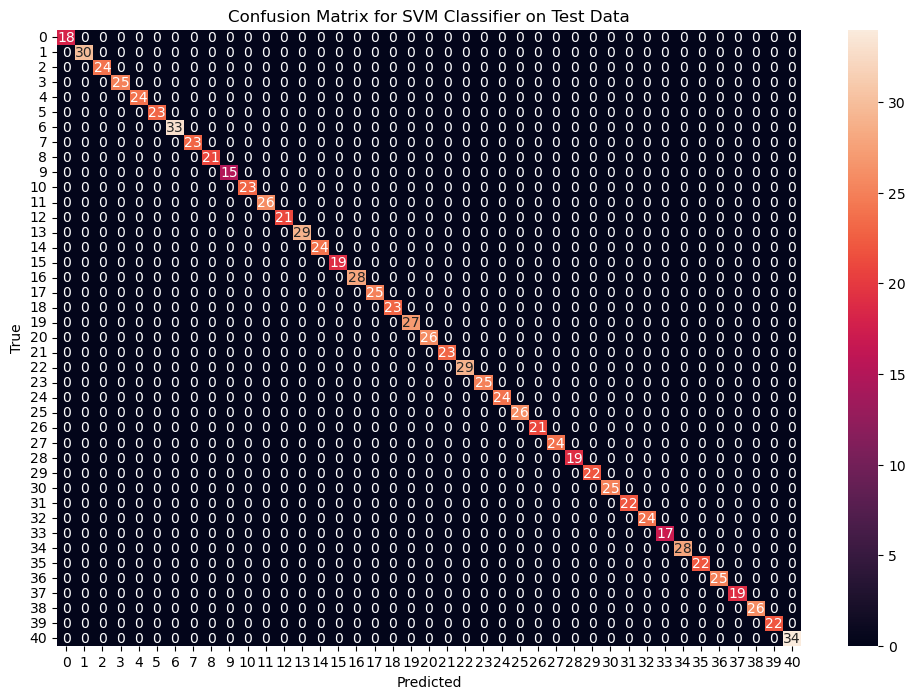

% Accuracy - train data - Naive Bayes Classifier: 100.0
% Accuracy - test data - Naive Bayes Classifier: 100.0


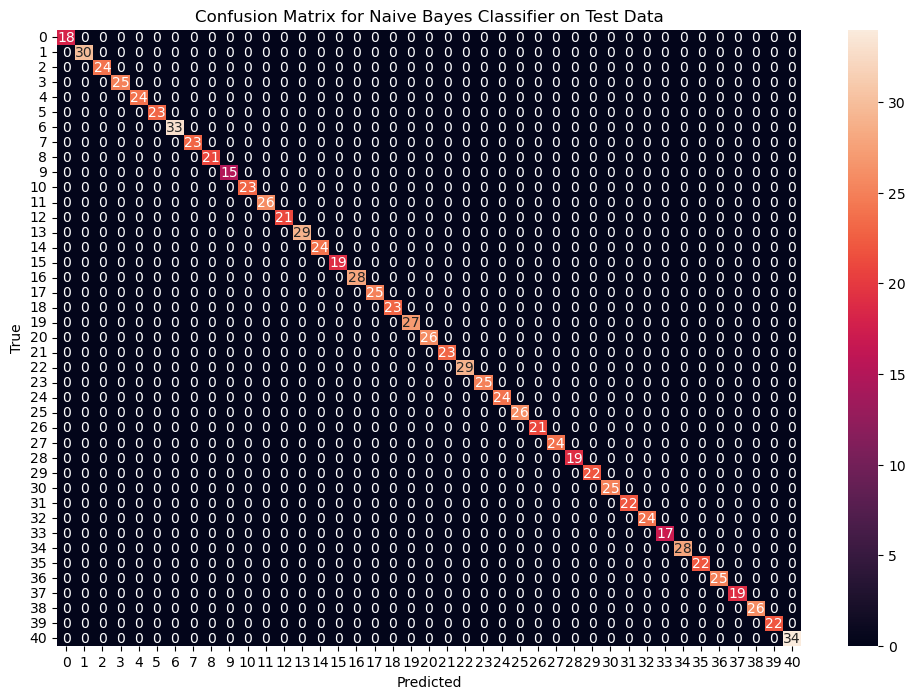

% Accuracy - train data - Random Forest Classifier: 100.0
% Accuracy - test data - Random Forest Classifier: 100.0


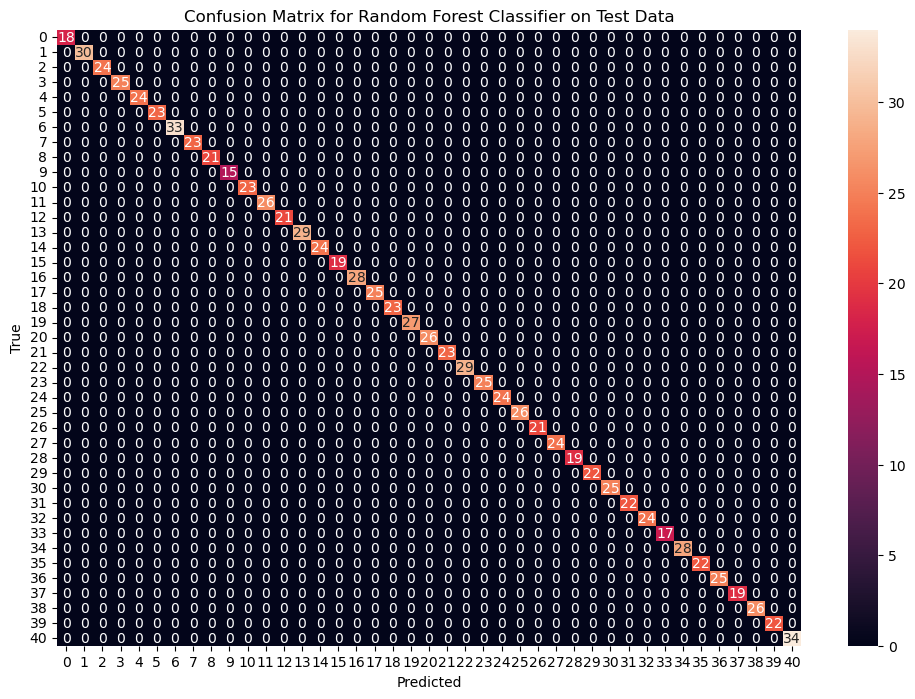

In [25]:
#Evaluating the models
#SVM Classifier
svm_preds, svm_model = train_and_test(SVC(), X_train, y_train, X_test, y_test, "SVM Classifier")
plot_confusion_matrix(y_test, svm_preds, "Confusion Matrix for SVM Classifier on Test Data")

#Naive Bayes Classifier
nb_preds, nb_model = train_and_test(GaussianNB(), X_train, y_train, X_test, y_test, "Naive Bayes Classifier")
plot_confusion_matrix(y_test, nb_preds, "Confusion Matrix for Naive Bayes Classifier on Test Data")

#Random Forest Classifier
rf_preds, rf_model = train_and_test(RandomForestClassifier(random_state=18), X_train, y_train, X_test, y_test, "Random Forest Classifier")
plot_confusion_matrix(y_test, rf_preds, "Confusion Matrix for Random Forest Classifier on Test Data")

* From the above, we see that the models are performing well on test data (unseen data).
* Now using the validation data given to us by kaggle to evaluate the models and use mode for finding the most accurate solution.

In [26]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

RandomForestClassifier(random_state=18)

In [28]:
test_X = test_df.iloc[:, :-1]
test_Y = encoder.transform(test_df.iloc[:, -1])
 
#Making prediction by take mode of predictions made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

In [29]:
#Function to find the mode (most common element) in a list
def find_mode(values):
    #Using Counter to count frequency of each value
    counter = Counter(values)
    #Finding the most common value and its count
    most_common = counter.most_common(1)[0][0]
    return most_common

#Applying the custom mode function in a list comprehension
final_preds = [find_mode([i, j, k]) for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

Accuracy on the validation (testing.csv given by kaggle) dataset by the combined model: 100.0


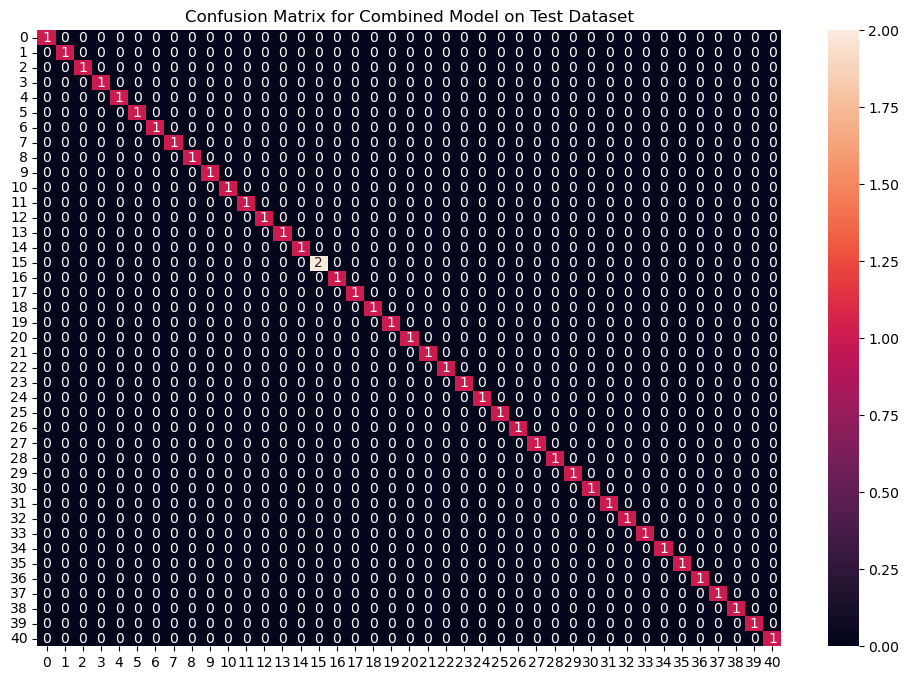

In [30]:
print(f"Accuracy on the validation (testing.csv given by kaggle) dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")
 
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

1. create_symptom_index Function: Mapping reformatted symptom names (spaces replaced with underscores, lowercase) to their indices in a dictionary called symptom_index.
2. prepare_data_dict Function: Preparing data_dict containing symptom_index and prediction_classes for disease prediction.
3. predictDisease Function - to predict disease based on input symptoms:
    * Splits input symptoms by commas into a list.
    * Initializes input_data with zeros, with length equal to the symptom count.
    * Sets indices in input_data to 1 for each present symptom.
    * Reshapes input_data for model input.
    * Uses Random Forest, Naive Bayes, and SVM models for disease prediction.
    * Final prediction determined by mode of individual model predictions.
    * Returns a dictionary with predictions from each model and the final prediction.

In [31]:
def create_symptom_index(dataframe):
    """Creates a dictionary mapping formatted symptom names to their corresponding index."""
    symptom_index = {symptom.replace(" ", "_").lower(): index for index, symptom in enumerate(dataframe.columns[:-1])}
    return symptom_index

def prepare_data_dict(df, encoder):
    """Prepares a data dictionary containing symptom index and prediction classes."""
    symptom_index = create_symptom_index(df)
    prediction_classes = encoder.classes_
    data_dict = {
        "symptom_index": symptom_index,
        "prediction_classes": prediction_classes
    }
    return data_dict

def predictDisease(input_symptoms, data_dict, models):
    """Predicts disease based on input symptoms using the combined model approach."""
    symptoms_list = input_symptoms.lower().split(", ")
    input_data = np.zeros(len(data_dict["symptom_index"]))
    
    #Setting the appropriate indices to 1 for the input symptoms
    for symptom in symptoms_list:
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
            
    input_data_reshaped = input_data.reshape(1, -1)
    
    #Making predictions using the models
    rf_prediction = models["Random Forest"].predict(input_data_reshaped)[0]
    nb_prediction = models["Naive Bayes"].predict(input_data_reshaped)[0]
    svm_prediction = models["SVC"].predict(input_data_reshaped)[0]
    
    #Determining the final prediction by taking the mode
    final_prediction = find_mode([rf_prediction, nb_prediction, svm_prediction])
    final_prediction_name = data_dict["prediction_classes"][final_prediction]
    
    #Returning a dictionary with the predictions
    return {
        "Random Forest Prediction": data_dict["prediction_classes"][rf_prediction],
        "Naive Bayes Prediction": data_dict["prediction_classes"][nb_prediction],
        "SVM Prediction": data_dict["prediction_classes"][svm_prediction],
        "Final Prediction": final_prediction_name
    }

# VI. Making a prediction:

In [32]:
data_dict = prepare_data_dict(df, encoder)
models = {"Random Forest": final_rf_model, "Naive Bayes": final_nb_model, "SVC": final_svm_model}

#Example input symptoms
input_symptoms = "itching, skin_rash, blackheads" 

#Predicting the disease
predictions = predictDisease(input_symptoms, data_dict, models)
print(predictions)

{'Random Forest Prediction': 'Acne', 'Naive Bayes Prediction': 'Acne', 'SVM Prediction': 'Acne', 'Final Prediction': 'Acne'}


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
